### ***1. Даны значения зарплат из выборки выпускников: 100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150. Посчитать (желательно без использования статистических методов наподобие std, var, mean) среднее арифметическое, среднее квадратичное отклонение, смещенную и несмещенную оценки дисперсий для данной выборки.***

In [1]:
import numpy as np
import pandas as pd
from math import factorial

In [65]:
salary_list = np.array([100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150])
df = pd.DataFrame(data=salary_list, columns=['Salary'])
df.describe().round(2)

,Salary
count,20.00
mean,65.30
std,31.62
min,17.00
25%,42.00
50%,67.50
75%,81.00
max,150.00


,Salary
19,150


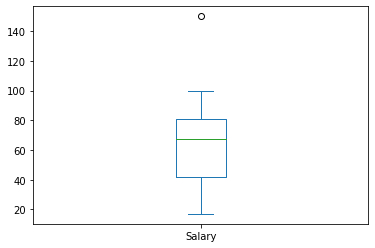

In [47]:
# Проверим выборку на выбросы
_, bp = df.Salary.plot.box(return_type='both')
outliers = [flier.get_ydata() for flier in bp["fliers"]][0]
df[df.Salary.isin(outliers)]

In [62]:
# Проверим уникальность элементов в выборке
print(df.Salary.value_counts())

75     2
65     2
100    1
30     1
90     1
84     1
70     1
55     1
57     1
24     1
17     1
80     1
25     1
45     1
33     1
89     1
77     1
150    1
Name: Salary, dtype: int64


In [61]:
# Посмотрим на значения, которые встречаются наиболее часто
print(df.Salary.mode())

0    65
1    75
dtype: int64


In [52]:
def mean(x):
    '''Среднее значение выборки числовых данных'''
    return sum(x) / len(x)

In [57]:
# среднее арифметическое
# Эта метрика чуствительна к выбросам
# Используем несколько методов

print(mean(df['Salary']))
print(np.mean(df['Salary']))
print(df['Salary'].mean())
mean_salary = df['Salary'].sum() / df['Salary'].shape[0] 
print(f'Cреднее арифметическое для зарплат из выборки выпускников равно {mean_salary}')

65.3
65.3
65.3
Cреднее арифметическое для зарплат из выборки выпускников равно 65.3


In [77]:
# среднее квадратичное отклонение
# Эта метрика чуствительна к выбросам
# Используем несколько методов

print(round(np.std(df.Salary, ddof=1), 2))

salary_std = np.sqrt(np.power((df['Salary'] - df['Salary'].mean()), 2).sum() / df['Salary'].count() - 1)
print(f'Cреднее квадратичное отклонение для зарплат из выборки выпускников равно {round(salary_std, 2)}')

31.62
Cреднее квадратичное отклонение для зарплат из выборки выпускников равно 30.81


In [78]:
# смещенная оценка дисперсии
# Эта метрика чуствительна к выбросам
# Используем несколько методов

print(np.var(df.Salary))

salary_variance = ((df['Salary'] - df['Salary'].mean())**2).sum() / df['Salary'].count()
print(f'Смещенная оценка дисперсии для зарплат из выборки выпускников равно {round(salary_variance, 2)}')

950.11
Смещенная оценка дисперсии для зарплат из выборки выпускников равно 950.11


In [81]:
# несмещенная оценка дисперсии
# Эта метрика чуствительна к выбросам
# Используем несколько методов

print(round(np.var(df.Salary, ddof=1), 2))

salary_variance2 = ((df['Salary'] - df['Salary'].mean())**2).sum() / (df['Salary'].count() - 1)
print(f'Несмещенная оценка дисперсии для зарплат из выборки выпускников равно {round(salary_variance2, 2)}')

1000.12
Несмещенная оценка дисперсии для зарплат из выборки выпускников равно 1000.12


### ***2. В первом ящике находится 8 мячей, из которых 5 - белые. Во втором ящике - 12 мячей, из которых 5 белых. Из первого ящика вытаскивают случайным образом два мяча, из второго - 4. Какова вероятность того, что 3 мяча белые?***

In [10]:
# Функция для вычисления числа сочетаний

def combinations(k: int, n: int) -> int: 
    return int(factorial(n) / (factorial(k) * factorial(n - k)))

In [11]:
# Функция для вычисления гипергеометрической вероятности

def hypergeometric(K: int, N: int, n: int, k: int) -> int:
    return round((combinations(k, K) * combinations((n - k), (N - K))) / combinations(n, N), 2)

In [14]:
N1 = 8 # Количество мячей в первом ящике
K1 = 5 # Количество белых мячей в первом ящике
N2 = 12 # Количество мячей во втором ящике
K2 = 5 # Количество белых мячей во втором ящике
n1 = 2 # Количество мячей, извлеченных из первого ящика
n2 = 4 # Количество мячей, извлеченных из второго ящика

In [15]:
# Какова вероятность того, что 3 мяча белые?
# Первый случай (A)

k1 = 1 # Количество белых мячей, извлеченных из первого ящика
k2 = 2 # Количество белых мячей, извлеченных из второго ящика
p_1_case_A = hypergeometric(K1, N1, n1, k1)
p_2_case_A = hypergeometric(K2, N2, n2, k2)
multi_case_A = p_1_case_A * p_2_case_A
print(p_1_case_A, p_2_case_A)

0.54 0.42


In [16]:
# Второй случай (B)

k1 = 2 # Количество белых мячей, извлеченных из первого ящика
k2 = 1 # Количество белых мячей, извлеченных из второго ящика
p_1_case_B = hypergeometric(K1, N1, n1, k1)
p_2_case_B = hypergeometric(K2, N2, n2, k2)
multi_case_B = p_1_case_B * p_2_case_B
print(p_1_case_B, p_2_case_B)

0.36 0.35


In [17]:
# Третий случай (С)

k1 = 0 # Количество белых мячей, извлеченных из первого ящика
k2 = 3 # Количество белых мячей, извлеченных из второго ящика
p_1_case_C = hypergeometric(K1, N1, n1, k1)
p_2_case_C = hypergeometric(K2, N2, n2, k2)
multi_case_C = p_1_case_C * p_2_case_C
print(p_1_case_C, p_2_case_C)

0.11 0.14


In [19]:
print(f'Вероятность того, что 3 мяча белые равна {(multi_case_A + multi_case_B + multi_case_C) * 100}%')

Вероятность того, что 3 мяча белые равна 36.82%


### ***3. На соревновании по биатлону один из трех спортсменов стреляет и попадает в мишень. Вероятность попадания для первого спортсмена равна 0.9, для второго — 0.8, для третьего — 0.6. Найти вероятность того, что выстрел произведен: a). первым спортсменом б). вторым спортсменом в). третьим спортсменом.***

In [21]:
pA1 = 0.9 # Вероятность попадания для первого спортсмена
pA2 = 0.8 # Вероятность попадания для второго спортсмена
pA3 = 0.6 # Вероятность попадания для третьего спортсмена

In [22]:
# а) Найти вероятность того, что выстрел произведен первым спортсменом
# б) Найти вероятность того, что выстрел произведен вторым спортсменом
# в) Найти вероятность того, что выстрел произведен третьим спортсменом
# Событие A - спортсмен попадает в мишень
# Гипотеза H1 - стреляет первый спортсмен
# Гипотеза H2 - стреляет второй спортсмен
# Гипотеза H3 - стреляет третий спортсмен

pH1 = pH2 = pH3 = 1 / 3

pH1_A = pA1 * pH1 / pA1 * pH1 + pA2 * pH2 + pA3 * pH3
print(f'a) Вероятность того, что выстрел произведен первым спортсменом равна {round(pH1_A * 100, 2)}%')

pH2_A = pA2 * pH2 / pA1 * pH1 + pA2 * pH2 + pA3 * pH3
print(f'б) Вероятность того, что выстрел произведен вторым спортсменом равна {round(pH2_A * 100, 2)}%')

pH3_A = pA3 * pH3 / pA1 * pH1 + pA2 * pH2 + pA3 * pH3
print(f'в) Вероятность того, что выстрел произведен третьим спортсменом равна {round(pH3_A * 100, 2)}%')

a) Вероятность того, что выстрел произведен первым спортсменом равна 57.78%
б) Вероятность того, что выстрел произведен вторым спортсменом равна 56.54%
в) Вероятность того, что выстрел произведен третьим спортсменом равна 54.07%


### ***4. В университет на факультеты A и B поступило равное количество студентов, а на факультет C студентов поступило столько же, сколько на A и B вместе. Вероятность того, что студент факультета A сдаст первую сессию, равна 0.8. Для студента факультета B эта вероятность равна 0.7, а для студента факультета C - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: a). на факультете A б). на факультете B в). на факультете C?***

In [25]:
pA = 0.8 # Вероятность того, что студент факультета A сдаст первую сессию.
pB = 0.7 # Вероятность того, что студент факультета B сдаст первую сессию.
pC = 0.9 # Вероятность того, что студент факультета C сдаст первую сессию.

# Событие А - студент сдал первую сессию
# Гипотеза H1 - студент учится на факультете А
# Гипотеза H2 - студент учится на факультете B
# Гипотеза H3 - студент учится на факультете С 
# x - количество студентов на факультете А
# x - количество студентов на факультете B
# y = 2x - количество студентов на факультете C

pH1 = 0.25
pH2 = 0.25
pH3 = 0.5

pH1_A = pA * pH1 / pA * pH1 + pB * pH2 + pC * pH3
print(f'Вероятность, что он учится на факультете А равна {pH1_A * 100}%')

pH2_A = pB * pH2 / pA * pH1 + pB * pH2 + pC * pH3
print(f'Вероятность, что он учится на факультете B равна {pH2_A * 100}%')

pH3_A = pC * pH3 / pA * pH1 + pB * pH2 + pC * pH3
print(f'Вероятность, что он учится на факультете C равна {pH3_A * 100}%')


Вероятность, что он учится на факультете А равна 68.75%
Вероятность, что он учится на факультете B равна 67.96875%
Вероятность, что он учится на факультете C равна 76.5625%


### ***5. Устройство состоит из трех деталей. Для первой детали вероятность выйти из строя в первый месяц равна 0.1, для второй - 0.2, для третьей - 0.25. Какова вероятность того, что в первый месяц выйдут из строя: а). все детали б). только две детали в). хотя бы одна деталь г). от одной до двух деталей?***

In [26]:
p1 = 0.1 # вероятность выйти из строя в первый месяц для первой детали
p2 = 0.2 # для второй
p3 = 0.25 # для третьей

# Вероятности противоположных событий

q1 = 1 - p1 
q2 = 1 - p2
q3 = 1 - p3

In [27]:
# a) все детали вышли из строя в первый месяц 
pH1_A = p1 * p2 * p3
print(f'Вероятность того, что все детали вышли из строя в первый месяц равна {round(pH1_A * 100, 2)}%')
# б) только две детали вышли из строя в первый месяц
pH2_A = p1 * p2 * q3 + p1 * q2 * p3 + q1 * p2 * p3
print(f'Вероятность того, что только две детали вышли из строя в первый месяц равна {round(pH2_A * 100, 2)}%')
# в) хотя бы одна деталь вышла из строя в первый месяц
pH3_A = 1 - (q1 * q2 * q3)
print(f'Вероятность того, что хотя бы одна деталь вышла из строя в первый месяц равна {pH3_A * 100}%')
# г) от одной до двух деталей вышли из строя в первый месяц
pH4_A = pH2_A * pH3_A
print(f'Вероятность того, что от одной до двух деталей вышли из строя в первый месяц равна {round(pH4_A * 100, 2)}%')

Вероятность того, что все детали вышли из строя в первый месяц равна 0.5%
Вероятность того, что только две детали вышли из строя в первый месяц равна 8.0%
Вероятность того, что хотя бы одна деталь вышла из строя в первый месяц равна 46.0%
Вероятность того, что от одной до двух деталей вышли из строя в первый месяц равна 3.68%
